## Network Analysis

In [260]:
import pandas as pd
import networkx as nx
import seaborn as sn
import matplotlib.pyplot as plt
import time
import numpy as np

### Read in data

In [473]:
G_sampled = nx.read_gml("../Data/G_data_sampled.gml")
G = nx.read_gml("../Data/G_data.gml")

Bringing in ALL data to see correlations across variables (maybe even things we are not building the network off of)

In [474]:
dunkin = pd.read_csv("../Data/dunkin.csv")
starbucks = pd.read_csv("../Data/starbucks.csv")

combined = pd.concat([starbucks, dunkin], ignore_index=True)
combined.reset_index(inplace=True)

# drop columns not needed
combined = combined.drop(['index', 'Unnamed: 0', 'text', 'hashtags', 'user_mention_ids', 'user_mention_screen_names', 'in_reply_to_user_id', 'retweet_count',
       'favorite_count', 'in_reply_to_screen_name', 'user_id', 'user_screen_name', 'user_name','user_followers_count', 'user_statuses_count','sentiment'], axis=1)
combined.head()

dunkin = dunkin.drop(['Unnamed: 0', 'text', 'hashtags', 'user_mention_ids', 'user_mention_screen_names', 'in_reply_to_user_id', 'retweet_count',
       'favorite_count', 'in_reply_to_screen_name', 'user_id', 'user_screen_name', 'user_name','user_followers_count', 'user_statuses_count','sentiment'], axis=1)

starbucks = starbucks.drop(['Unnamed: 0', 'text', 'hashtags', 'user_mention_ids', 'user_mention_screen_names', 'in_reply_to_user_id', 'retweet_count',
       'favorite_count', 'in_reply_to_screen_name', 'user_id', 'user_screen_name', 'user_name','user_followers_count', 'user_statuses_count','sentiment'], axis=1)    

starbucks.head()   

id           created_at  user_friends_count  user_favourites_count  user_verfied  num_words  negative  neutral  positive  sentiment_score
0  S1  2022-07-12 20:26:46                1571                  72821         False         10     0.126    0.874     0.000          -0.0772
1  S2  2022-07-12 20:26:43                  53                    222         False         26     0.130    0.434     0.436           0.8750
2  S3  2022-07-12 20:26:42                 659                   1128         False          6     0.000    1.000     0.000           0.0000
3  S4  2022-07-12 20:26:29                 274                   2275         False          9     0.559    0.441     0.000          -0.7650
4  S5  2022-07-12 20:26:17                 689                    266         False         18     0.261    0.459     0.279          -0.1280

### Split into Dunkin & Starbucks Plots

Get network of starbucks nodes only


In [475]:
nodes_sbux = (node 
              for node, data
              in G.nodes(data=True)
              if data.get("brand") == "starbucks")
G_sbux = G.subgraph(nodes_sbux)
print("~~~ Starbucks Network ~~~")
print("Number of Nodes: ", len(G_sbux.nodes))
print("Number of Edges: ", len(G_sbux.edges))

~~~ Starbucks Network ~~~
Number of Nodes:  5756
Number of Edges:  178923


Get network of dunkin nodes only

In [476]:
nodes_dd = (node 
              for node, data
              in G.nodes(data=True)
              if data.get("brand") == "dunkin")
G_dd = G.subgraph(nodes_dd)
print("~~~ Dunkin Network ~~~")
print("Number of Nodes: ", len(G_dd.nodes))
print("Number of Edges: ", len(G_dd.edges))

~~~ Dunkin Network ~~~
Number of Nodes:  5411
Number of Edges:  97487


## Correlations

### Convert Graph Object to Dataframe

Entire Network - Node Attribute DF

In [477]:
# create DF
G_node_attr = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

# add degrees of each node
G_node_attr['degree'] = [val for (node, val) in G.degree()]

G_node_attr['id'] = G_node_attr.index

G_node_attr.head()


text_split      brand influencer_status sentiment  user_followers_count  retweet_count  favorite_count  num_unique_words  normalized_degree  degree    id
S1    [starbuck, whole, one, capit, espresso, shaken...  starbucks                No  negative                  1147              0               0                10           0.100000       1    S1
S338  [whole, mask, trust, starbuck, recogn, peopl, ...  starbucks                No  positive                   178              0               0                20           2.900000      58  S338
S2    [chang, bestfriend, cheap, give, got, trust, a...  starbucks                No  positive                     4              0               0                26           1.153846      30    S2
S56     [starbuck, ur, half, deal, life, ruin, work, u]  starbucks                No  negative                  1517              0               0                 8           0.625000       5   S56
S249  [school, spot, chang, make, never, bud, gradua...  starbucks               Yes   neutral                  4981              0               3                25           4.400000     110  S249

Dunkin Only - Node Attribute DF

In [550]:
G_node_attr['text_split'].isna().sum()

0

In [478]:
# create DF
G_dd_node_attr = pd.DataFrame.from_dict(dict(G_dd.nodes(data=True)), orient='index')

# add degrees of each node
G_dd_node_attr['degree'] = [val for (node, val) in G_dd.degree()]

G_dd_node_attr['id'] = G_dd_node_attr.index

G_dd_node_attr.head()


text_split   brand influencer_status sentiment  user_followers_count  retweet_count  favorite_count  num_unique_words  normalized_degree  degree     id
D6380  [theori, disprov, consist, almost, boston, dun...  dunkin                No  negative                  1585              0               1                11           1.818182      19  D6380
D5948                     [ur, girl, dunkin, donut, got]  dunkin                No   neutral                   424              0               5                 5           0.800000       4  D5948
D4836  [might, munchkin, crime, never, find, restaur,...  dunkin                No  positive                   447              0               1                13           1.538462      19  D4836
D6015  [better, live, sir, short, dunkin, donut, life...  dunkin                No  negative                    16              0               4                11           0.272727       3  D6015
D2703  [lacross, would, profession, wow, regular, pic...  dunkin                No  positive                    14              0               4                10           0.500000       5  D2703

Starbucks Only - Node Attribute DF

In [479]:
# create DF
G_sbux_node_attr = pd.DataFrame.from_dict(dict(G_sbux.nodes(data=True)), orient='index')

# add degrees of each node
G_sbux_node_attr['degree'] = [val for (node, val) in G_sbux.degree()]

G_sbux_node_attr['id'] = G_sbux_node_attr.index

G_sbux_node_attr.head()

text_split      brand influencer_status sentiment  user_followers_count  retweet_count  favorite_count  num_unique_words  normalized_degree  degree    id
S1    [starbuck, whole, one, capit, espresso, shaken...  starbucks                No  negative                  1147              0               0                10           0.100000       1    S1
S338  [whole, mask, trust, starbuck, recogn, peopl, ...  starbucks                No  positive                   178              0               0                20           2.900000      47  S338
S2    [chang, bestfriend, cheap, give, got, trust, a...  starbucks                No  positive                     4              0               0                26           1.153846      23    S2
S56     [starbuck, ur, half, deal, life, ruin, work, u]  starbucks                No  negative                  1517              0               0                 8           0.625000       5   S56
S249  [school, spot, chang, make, never, bud, gradua...  starbucks               Yes   neutral                  4981              0               3                25           4.400000      91  S249

### Correlations on node attribute data ONLY

Entire Network

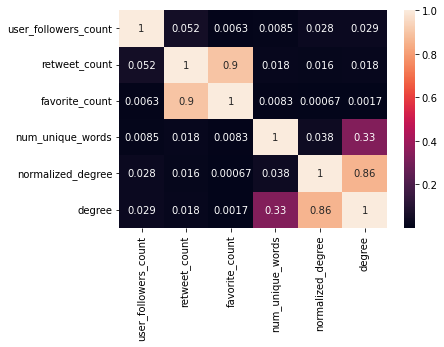

In [480]:
corr_matrix = G_node_attr.corr()
corr_matrix
sn.heatmap(corr_matrix, annot=True)
plt.show()

Dunkin Only

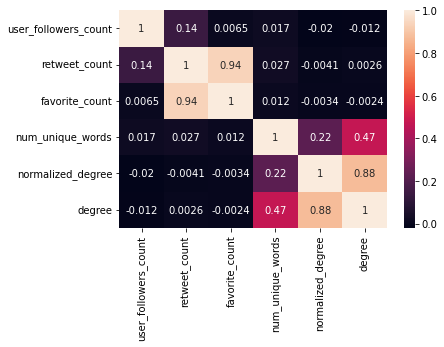

In [481]:
corr_matrix = G_dd_node_attr.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

Starbucks Only

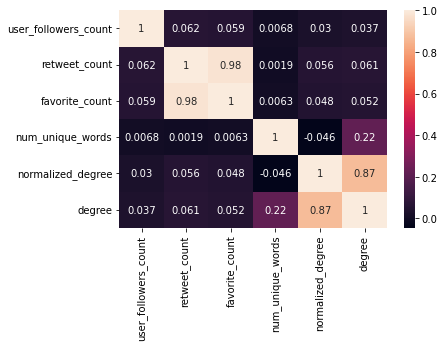

In [482]:
corr_matrix = G_sbux_node_attr.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

* rt_count and fav_count are more highly correlated for sbux (0.97) than dunkin (0.84)

    * sbux tweets are more likely to get boosted (faved and rt'd)


* rt_count and user_followers are more highly correlated for dunkin (0.12) than sbux (0.062)

    * It seems like for dunkin, a tweet tweeted by someone with alot of followers has a greater impact on # of rts that tweet gets (and vice versa)

    * starbucks tweets don't necessarily have to have a high follower count to make an impact on # of rts

    * Is this because starbucks is tweeted about more? so any old person could get a 'hit' tweet if tweeting about starbucks? Or a celebrity could shoot out a random tweet about starbucks but it won't necesarrily get a lot of rts bc twitter is saturated with sbux tweets? idk just theorizing 

### Correlations on node attribute AND other tweet data

Adding data from the original dunkin/starbucks dataframes to look for correlations

In [483]:
# left join additional data with node attributes data - combined 
G_node_attr = G_node_attr.merge(combined, on = 'id', how = 'left')

# left join additional data with node attributes data - dunkin
G_dd_node_attr = G_dd_node_attr.merge(dunkin, on = 'id', how = 'left')

# left join additional data with node attributes data - sbux
G_sbux_node_attr = G_sbux_node_attr.merge(starbucks, on = 'id', how = 'left')

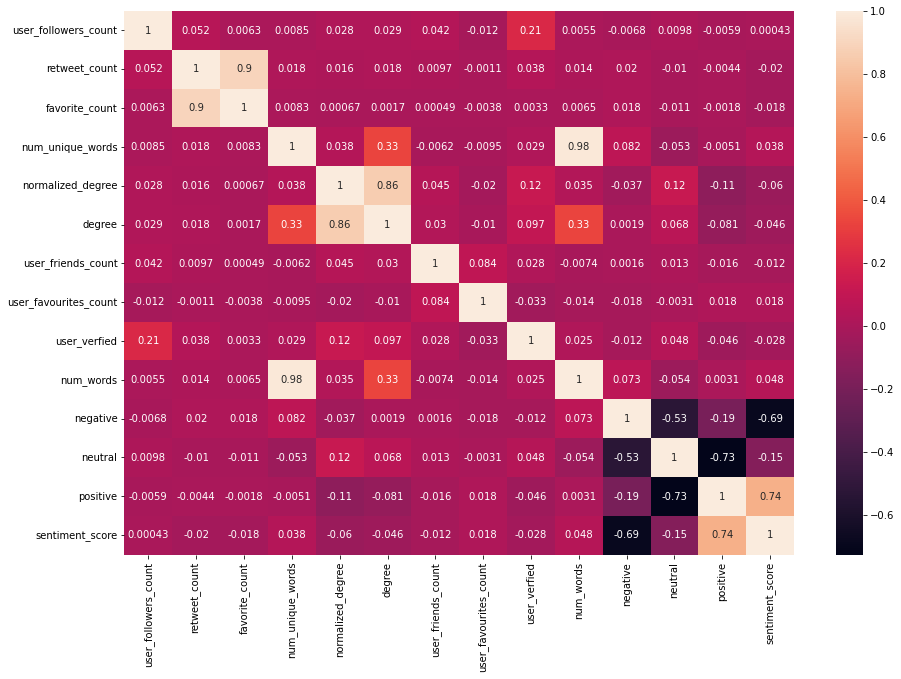

In [484]:
# correlations
fig, ax = plt.subplots(figsize=(15,10))
corr_matrix = G_node_attr.corr()
corr_matrix
sn.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

**Takeaways on SAMPLED DATA:**

* Alot of the high correlations between node attributes are common sense (user follower count & rt count for example)

* strong (r > 0.5) positive correaltion between **degree** and num_words. This makes sense since our edges are built off of number of *similar* words between 2 tweets. The higher the number of words the more likely that 2 tweets will have similar words 

* weak (0.1 < r < 0.3) positive correlations between **degree** and favourite_count, **degree** and positive, **num_words** and favourite_count

    * tweets with a higher number of words possibly get liked more?
     
    

* weak (0.1 < r < 0.3) negative correlation between **degree** neutral

* I think it's interesting how **user_favourites_count** (number of Tweets this user has liked in the account’s lifetime) had stronger correlations with 'negative' (.13) and 'neutral' (-.15) than 'positive' (.058). People tweeting 'negative' tweets are more likely to favourite more things? Neutrals are less likely to? kind of out of sccope 

Dunkin Only

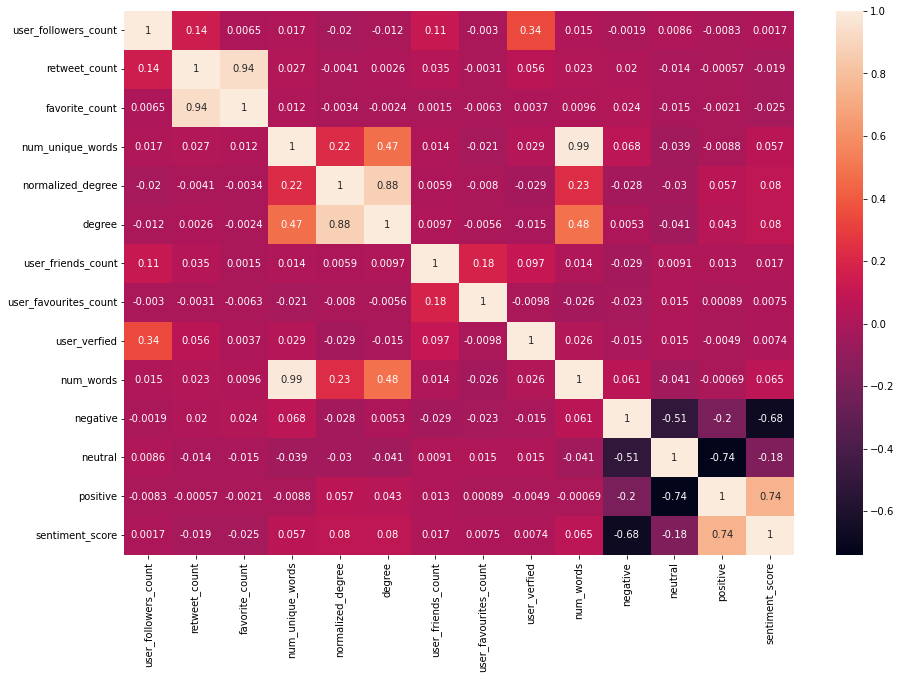

In [485]:
# correlations
fig, ax = plt.subplots(figsize=(15,10))
corr_matrix = G_dd_node_attr.corr()
corr_matrix
sn.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

Starbucks Only

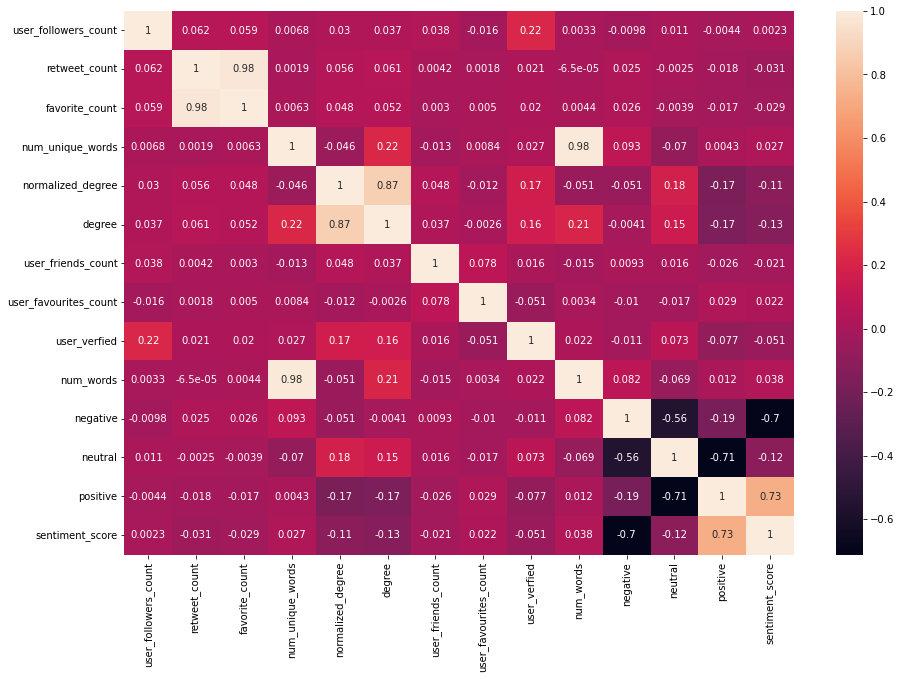

In [486]:
# correlations
fig, ax = plt.subplots(figsize=(15,10))
corr_matrix = G_sbux_node_attr.corr()
sn.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

## Basic Stats

### Percentage Frequency Tables

(categorical variables)

Brand by Sentiment

/var/folders/j9/5ttr_0q15gjf7thf7xz1dq_40000gn/T/ipykernel_28678/2188283897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G_node_attr.brand[G_node_attr['brand'] == 'dunkin'] = 'Dunkin\''
/var/folders/j9/5ttr_0q15gjf7thf7xz1dq_40000gn/T/ipykernel_28678/2188283897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G_node_attr.brand[G_node_attr['brand'] == 'starbucks'] = 'Starbucks'


ENTIRE NETWORK
=====
 sentiment  negative   neutral  positive
brand                                  
Dunkin'    0.238958  0.309739  0.451303
Starbucks  0.269458  0.328179  0.402363


Text(0, 0.5, 'Proportion of Tweets')

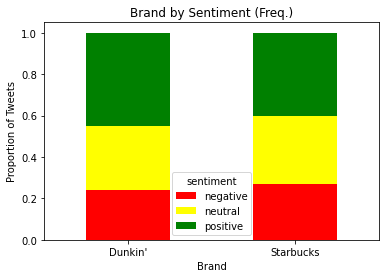

In [835]:
# G_node_attr.brand[G_node_attr['brand'] == 'dunkin'] = 'Dunkin\''
# G_node_attr.brand[G_node_attr['brand'] == 'starbucks'] = 'Starbucks'
freq_en = pd.crosstab(index = G_node_attr['brand'], columns=G_node_attr['sentiment'])
tab = freq_en.div(freq_en.sum(axis=1), axis=0)
print("ENTIRE NETWORK\n=====\n", tab)

tab.plot.bar(stacked = True, title = "Brand by Sentiment (Freq.)", color = ['red', 'yellow', 'green'])
plt.xticks(rotation = 0)
plt.xlabel("Brand")
plt.ylabel("Proportion of Tweets")

* higher % of starbucks tweets are negative - does a 3% difference justify saying something like 'starbucks tweeters are more negative?'

* lower % of starbucks tweets are positive ~ 5%

#### Who has more Influencers?

influencer_status        No       Yes
brand                                
dunkin             0.897246  0.102754
starbucks          0.886032  0.113968

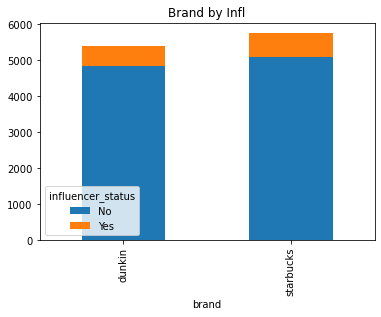

In [490]:
freq_en = pd.crosstab(index = G_node_attr['brand'], columns=G_node_attr['influencer_status'])
freq_en.plot.bar(stacked = True, title = "Brand by Infl")
tab = freq_en.div(freq_en.sum(axis=1), axis=0)
tab


Influencer Status by Sentiment

In [491]:
freq_en = pd.crosstab(index = G_node_attr['influencer_status'], columns=G_node_attr['sentiment'])
tab = freq_en.div(freq_en.sum(axis=1), axis=0)
print("ENTIRE NETWORK\n=====\n", tab)

freq_dd = pd.crosstab(index = G_dd_node_attr['influencer_status'], columns=G_dd_node_attr['sentiment'])
tab_dd = freq_dd.div(freq_dd.sum(axis=1), axis=0)
print("\nDUNKIN\n=====\n", tab_dd)

freq_sb = pd.crosstab(index = G_sbux_node_attr['influencer_status'], columns=G_sbux_node_attr['sentiment'])
tab_sb = freq_sb.div(freq_sb.sum(axis=1), axis=0)
print("\nSTARBUCKS\n=====\n", tab_sb)

ENTIRE NETWORK
=====
 sentiment          negative   neutral  positive
influencer_status                              
No                 0.253842  0.317328  0.428830
Yes                0.261551  0.334983  0.403465

DUNKIN
=====
 sentiment          negative   neutral  positive
influencer_status                              
No                 0.241813  0.310814  0.447374
Yes                0.214029  0.300360  0.485612

STARBUCKS
=====
 sentiment          negative   neutral  positive
influencer_status                              
No                 0.265294  0.323529  0.411176
Yes                0.301829  0.364329  0.333841


entire network - pretty much same ~ 1 - 2% diffs

**DUNKIN**

* Higher % of Dunkin Influencers tweet positively ~ 4%

**STARBUCKS**

* Higher % of Starbucks Influencers tweet negatively ~ 4%

* Lower % of Starbucks Influencers tweet positively ~ 8%




something to look for --- do influencer tweets have high degree? ie. are they 'influencing' the users around them to tweet similar ideas ?


Sentiment score & Degree 


### Distributions

Text(0.5, 1.0, 'Words per Tweet Distribution Starbucks')

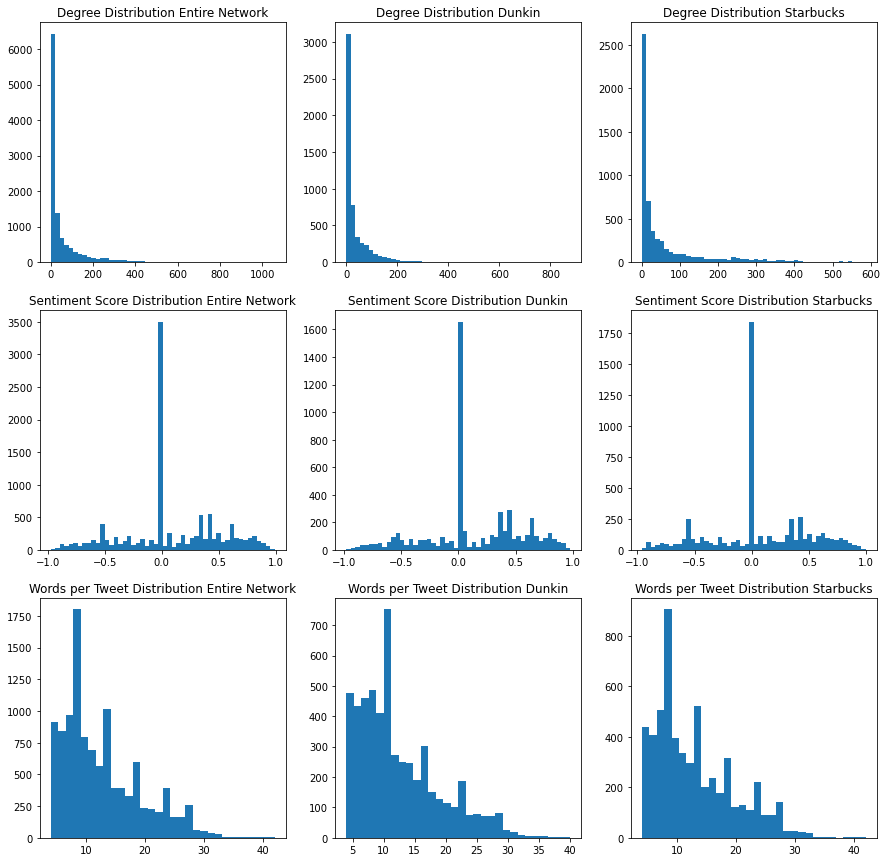

In [492]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))
ax[0,0].hist(G_node_attr['degree'], bins = 50)
ax[0,0].set_title("Degree Distribution Entire Network")
ax[1,0].hist(G_node_attr['sentiment_score'], bins = 50)
ax[1,0].set_title("Sentiment Score Distribution Entire Network")
ax[2,0].hist(G_node_attr['num_words'], bins = 30)
ax[2,0].set_title("Words per Tweet Distribution Entire Network")

ax[0,1].hist(G_dd_node_attr['degree'],bins = 50)
ax[0,1].set_title("Degree Distribution Dunkin")
ax[1,1].hist(G_dd_node_attr['sentiment_score'],bins = 50)
ax[1,1].set_title("Sentiment Score Distribution Dunkin")
ax[2,1].hist(G_dd_node_attr['num_words'],bins = 30)
ax[2,1].set_title("Words per Tweet Distribution Dunkin")

ax[0,2].hist(G_sbux_node_attr['degree'],bins = 50)
ax[0,2].set_title("Degree Distribution Starbucks")
ax[1,2].hist(G_sbux_node_attr['sentiment_score'],bins = 50)
ax[1,2].set_title("Sentiment Score Distribution Starbucks")
ax[2,2].hist(G_sbux_node_attr['num_words'],bins = 30)
ax[2,2].set_title("Words per Tweet Distribution Starbucks")

* words per tweet distribution for starbucks and entire network are similar 

* degree distrubutions are also similar for starbucks & entire network. There's a hump right after the 500 degree mark. I wonder why theres a spike of tweets with degree between ~ 500 - 750 for starbucks 

    * is the sbux network more densely connected??

### Quick Plots

##### Colored by Brand

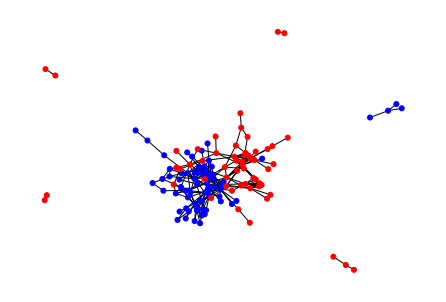

In [9]:
node_color = []

for node in G_sampled.nodes(data=True):

    if 'starbucks' in node[1]['brand']:
        node_color.append('blue')
    elif 'dunkin' in node[1]['brand']:
        node_color.append('red')

nx.draw(G_sampled, with_labels=False, node_size=25, node_color=node_color)

##### Colored by Sentiment

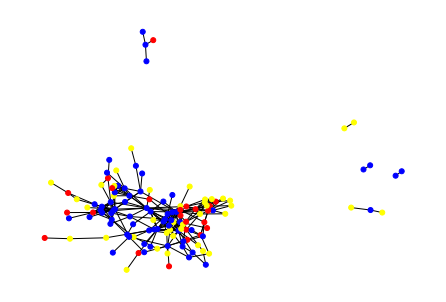

In [4]:
node_color = []

for node in G_sampled.nodes(data=True):

    if 'positive' in node[1]['sentiment']:
        node_color.append('blue')
    elif 'negative' in node[1]['sentiment']:
        node_color.append('red')
    elif 'neutral' in node[1]['sentiment']:
        node_color.append('yellow')

nx.draw(G_sampled, with_labels=False, node_size=25, node_color=node_color)

##### Colored by Influencer Status

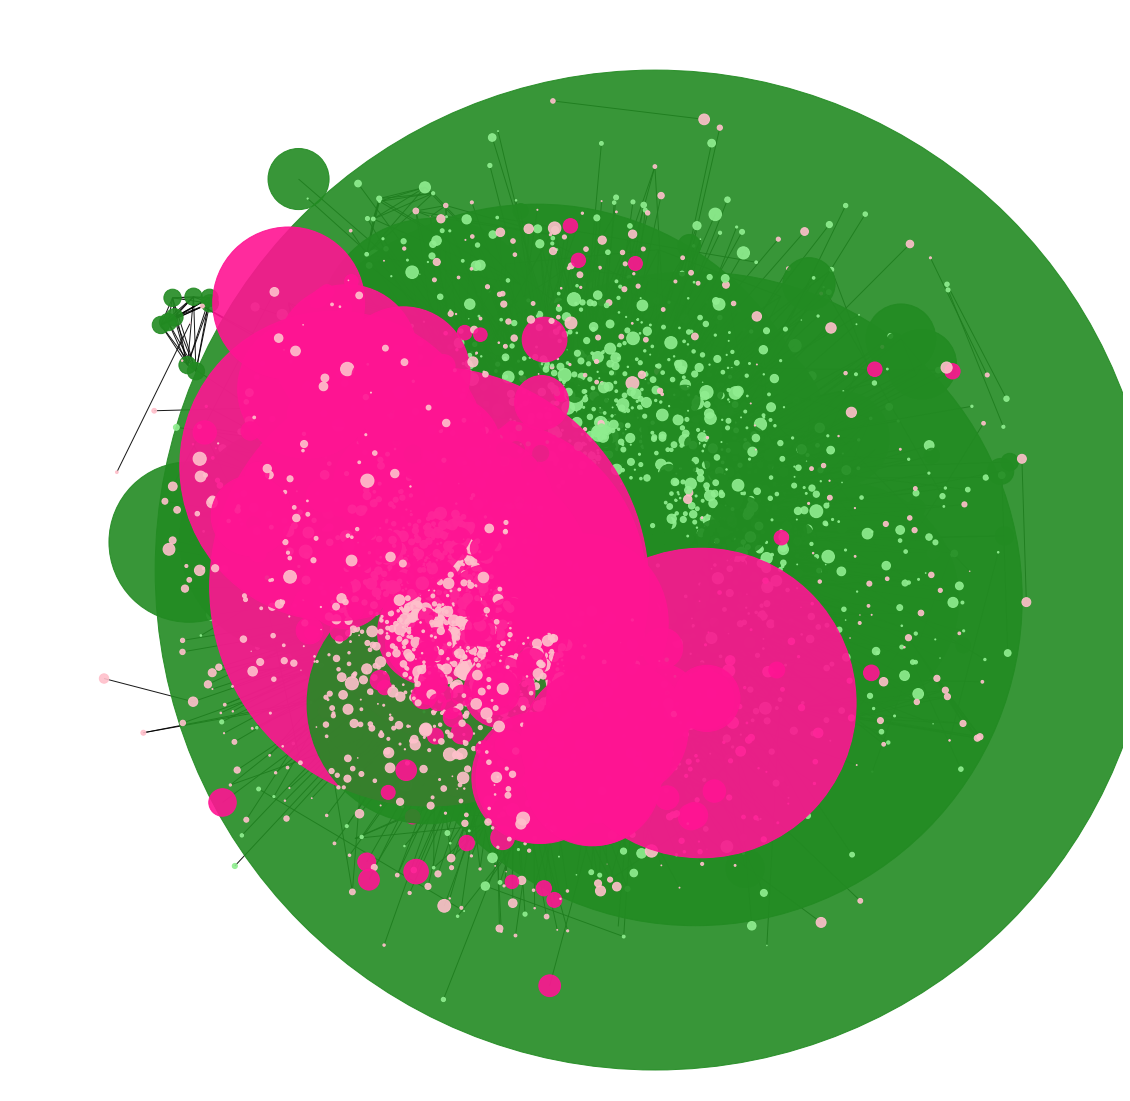

In [251]:
node_color = []
node_alpha = []

# Node size
user_followers = nx.get_node_attributes(G, 'user_followers_count')

user_followers = [v/20 for v in user_followers.values()] # divided by 10 so the graph was understandable

# node color + opacity 
for node in G.nodes(data=True):

    if 'starbucks' in node[1]['brand']:

        if 'Yes' in node[1]['influencer_status']:
             node_color.append('forestgreen')
        elif 'No' in node[1]['influencer_status']:
             node_color.append('lightgreen')

    elif 'dunkin' in node[1]['brand']:
        
        if 'Yes' in node[1]['influencer_status']:
             node_color.append('deeppink')
        elif 'No' in node[1]['influencer_status']:
             node_color.append('pink')


fig, ax = plt.subplots(figsize=(20, 20))

nx.draw(G, with_labels=False, node_size = user_followers, node_color=node_color,ax=ax,
 pos = nx.spring_layout(G, k=.30, iterations=200), alpha=.9)

looks kinda insane rn

For dunkin, there are alot of smaller nodes (ie. they have less number of followers) tthat are actually influencers (dark pink)

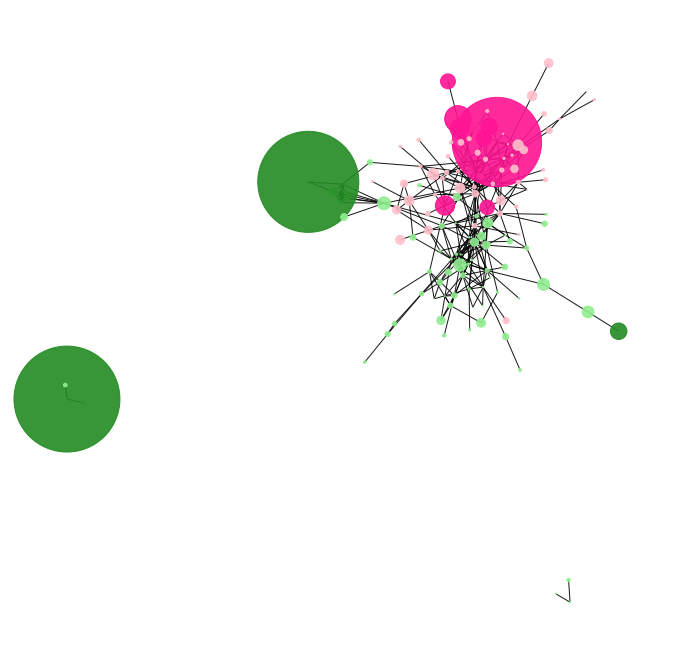

In [493]:
node_color = []
node_alpha = []

# Node size
user_followers = nx.get_node_attributes(G_sampled, 'user_followers_count')

user_followers = [v/20 for v in user_followers.values()] # divided by 10 so the graph was understandable

# node color + opacity 
for node in G_sampled.nodes(data=True):

    if 'starbucks' in node[1]['brand']:

        if 'Yes' in node[1]['influencer_status']:
             node_color.append('forestgreen')
        elif 'No' in node[1]['influencer_status']:
             node_color.append('lightgreen')

    elif 'dunkin' in node[1]['brand']:
        
        if 'Yes' in node[1]['influencer_status']:
             node_color.append('deeppink')
        elif 'No' in node[1]['influencer_status']:
             node_color.append('pink')


fig, ax = plt.subplots(figsize=(12, 12))

nx.draw(G_sampled, with_labels=False, node_size = user_followers, node_color=node_color,ax=ax,
 pos = nx.spring_layout(G_sampled, k=.30, iterations=200), alpha=.9)

## Community Detection

### Louvain Algorithm

**NOTE**

**Louvain Algorithm was run. Community labels were assigned to each node and the network was exported into Gephi for visualization**

The below is general network EDA on top 15 communities using nx.draw() - none of these plots were used in the report or the presentation. This was just for the sake of experimenting 

In [785]:
from community import community_louvain

# run algorithm
# comms = community_louvain.best_partition(G_sampled)
comms_G = community_louvain.best_partition(G)

In [801]:
# starbucks
comms_sb = community_louvain.best_partition(G_sbux, resolution=25)
# dunkin
comms_dd = community_louvain.best_partition(G_dd, resolution=25)

In [802]:
# set community attr
# nx.set_node_attributes(G, comms_G, 'community')
nx.set_node_attributes(G_sbux, comms_sb, 'community')
nx.set_node_attributes(G_dd, comms_dd, 'community')

In [803]:
# Create a DF for communities 
# louvain_comms = pd.DataFrame(comms_G.items(), columns = ['id', 'community'])
louvain_comms_sb = pd.DataFrame(comms_sb.items(), columns = ['id', 'community'])
louvain_comms_dd = pd.DataFrame(comms_dd.items(), columns = ['id', 'community'])

In [756]:
louvain_comms_sb.groupby(['community']).size().nlargest(10)

community
0      4533
36      957
12       44
110       9
108       8
1         7
35        5
111       4
23        3
45        3
dtype: int64

In [731]:
louvain_comms_dd.groupby(['community']).size().nlargest(10)

community
54    5197
1       10
32      10
40      10
18       4
25       4
31       4
4        3
5        3
6        3
dtype: int64

In [739]:
# get the number of nodes in top 15 communities (146 comms have to reduce)
top_15_comms = list(louvain_comms.groupby(['community']).size().nlargest(15).index)
top_10_comms_sb = list(louvain_comms_sb.groupby(['community']).size().nlargest(10).index)
top_10_comms_dd = list(louvain_comms_dd.groupby(['community']).size().nlargest(10).index)

# only keep top 15 comms (15th biggest comm is 20 nodes big)
top_15_comms

top_15_comms_nodes = (node 
              for node, data
              in G.nodes(data=True)
              if data.get("community") in (top_15_comms))

# filter network 
G_15 = G.subgraph(top_15_comms_nodes)

# SBUX
top_10_comms_nodes = (node 
              for node, data
              in G_sbux.nodes(data=True)
              if data.get("community") in (top_10_comms_sb))

# filter network 
G_sbux_10 = G_sbux.subgraph(top_10_comms_nodes)

# DUNKIN
top_10_comms_nodes = (node 
              for node, data
              in G_dd.nodes(data=True)
              if data.get("community") in (top_10_comms_dd))

# filter network 
G_dd_10 = G_dd.subgraph(top_10_comms_nodes)



In [757]:
# get all rows where community is in our top 15 communities 
# louvain_comms = louvain_comms.loc[louvain_comms['community'].isin(top_15_comms)]
# louvain_comms.head()

# SBUX
louvain_comms_sb = louvain_comms_sb.loc[louvain_comms_sb['community'].isin(top_10_comms_sb)]
louvain_comms_sb.head()

id  community
0    S1          0
1  S338          0
2    S2          0
3   S56          0
4  S249          0

In [740]:
# filter comms_G by top 15 communities
comms_G = { key:value for (key,value) in comms_G.items() if value in top_15_comms}
comms_sb = { key:value for (key,value) in comms_sb.items() if value in top_10_comms_sb}
comms_dd = { key:value for (key,value) in comms_dd.items() if value in top_10_comms_dd}

* detected 146 communities 

In [ ]:
import matplotlib.cm as cm
# unique_coms = np.unique(list(comms.values()))
# cmap = {
#     0 : 'maroon',
#     1 : 'teal',
#     2 : 'black', 
#     3 : 'orange',
#     4 : 'lightgreen',
#     5 : 'yellow',
#     6 : 'blue',
#     7 : 'pink',
#     8 : 'darkgreen',
#     9 : 'brown',
#     10 : 'purple',
#     11 : 'grey',
#     12 : 'red'
# }

# node_cmap = [cmap[v] for _,v in comms.items()]
node_cmap = cm.get_cmap('rainbow', max(comms_G.values()) + 1)

fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G_15, k=.25, iterations=100)
nx.draw(G_15, pos, node_size = 50, alpha = 0.85, cmap=node_cmap, node_color=list(comms_G.values()), ax=ax)
plt.show()

In [777]:
len(G_15.nodes())

4632

In [798]:
nx.write_gml(G, "../Data/Gv2.gml")

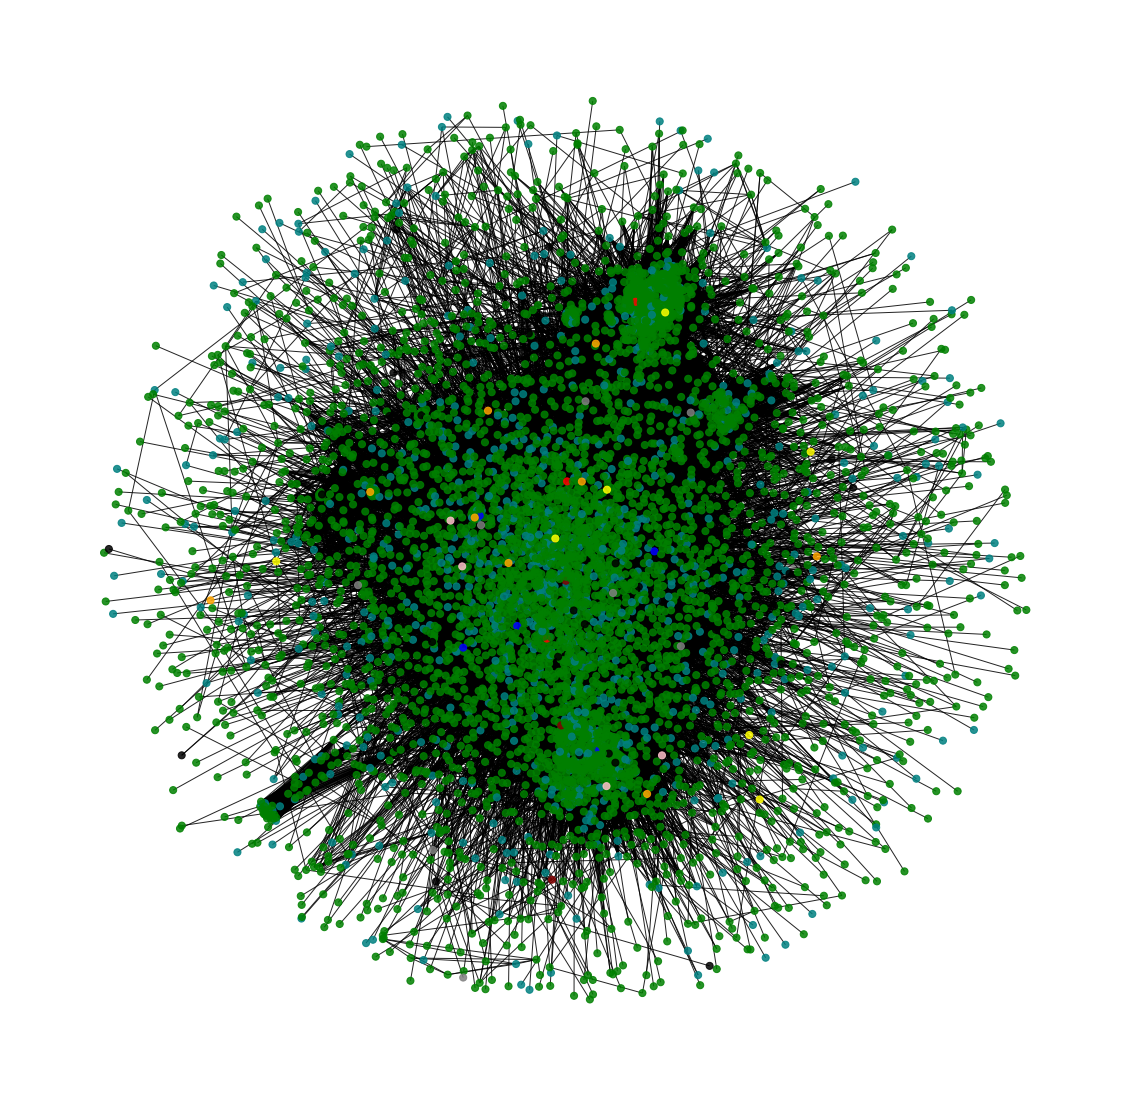

In [745]:
# STARBUCKS #
cmap = {
    0 : 'green',
    36 : 'teal',
    12 : 'black', 
    110 : 'orange',
    108 : 'grey',
    1 : 'yellow',
    35 : 'blue',
    111 : 'pink',
    23 : 'maroon',
    45 : 'red'
}

node_cmap = [cmap[v] for _,v in comms_sb.items()]
unique_coms_sb = np.unique(list(comms_sb.values()))

# # node_cmap = [cmap[v] for _,v in comms.items()]
# node_cmap = cm.get_cmap('rainbow', max(comms_sb.values()) + 1)

fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G_sbux_10, k=.25, iterations=100)
nx.draw(G_sbux_10, pos, node_size = 50, alpha = 0.85, node_color=node_cmap, ax=ax)
plt.show()

In [806]:
nx.write_gml(G_sbux, "../Data/G_sbux.gml")

In [747]:
top_10_comms_dd

[54, 1, 32, 40, 18, 25, 31, 4, 5, 6]

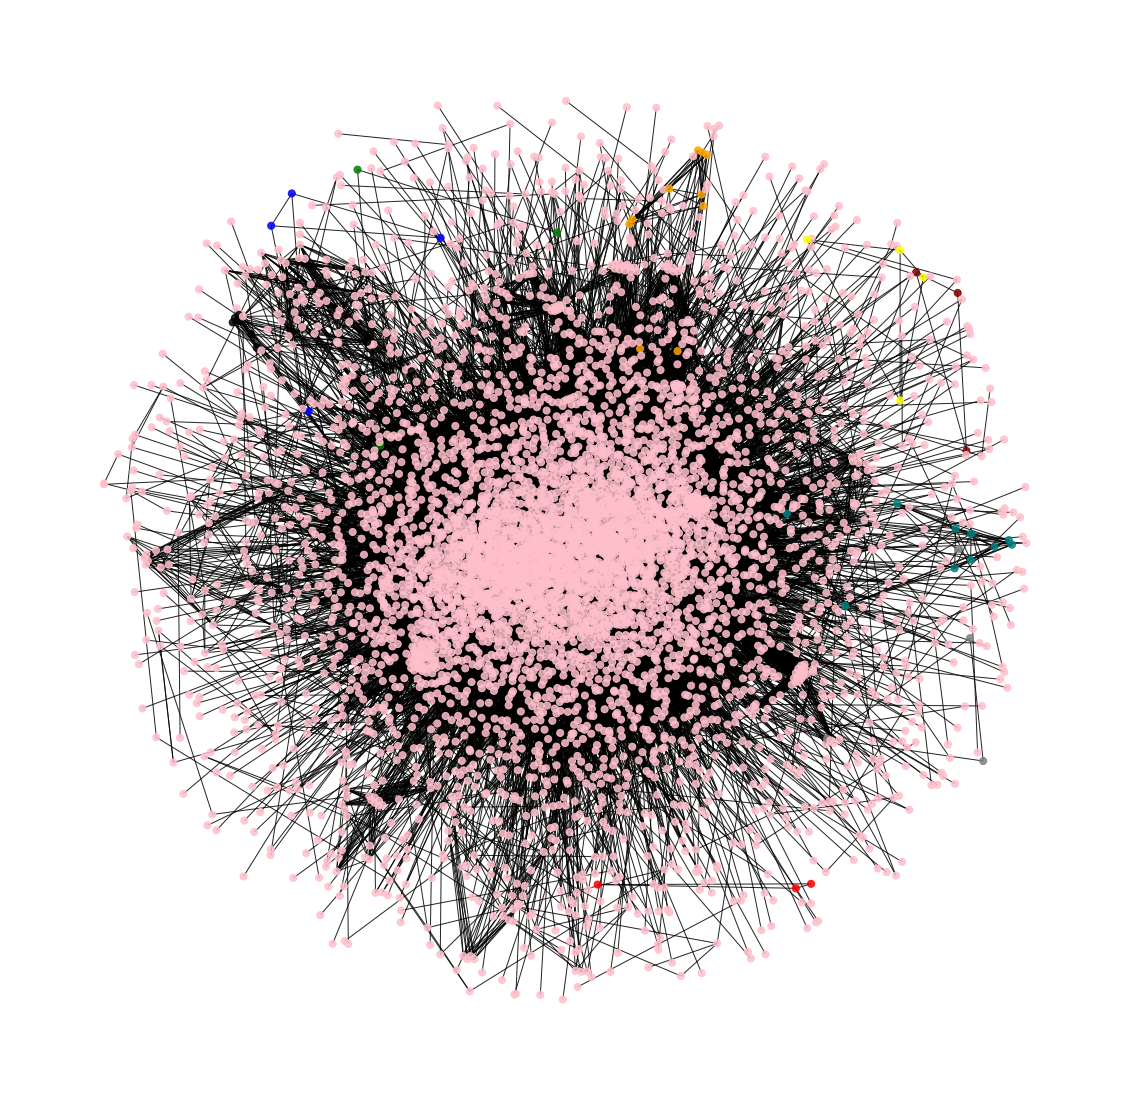

In [748]:
# DUNKIN #
cmap = {
    54 : 'pink',
    1 : 'teal',
    32 : 'black', 
    40 : 'orange',
    18 : 'grey',
    25 : 'yellow',
    31 : 'blue',
    4 : 'green',
    5 : 'maroon',
    6 : 'red'
}

node_cmap = [cmap[v] for _,v in comms_dd.items()]

# np.unique(list(comms_dd.values()))

# node_cmap = [cmap[v] for _,v in comms.items()]
# node_cmap = cm.get_cmap('rainbow', max(comms_dd.values()) + 1)

fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G_dd_10, k=.25, iterations=100)
nx.draw(G_dd_10, pos, node_size = 50, alpha = 0.85, node_color=node_cmap, ax=ax)
plt.show()

In [807]:
nx.write_gml(G_dd, "../Data/G_dd.gml")

In [804]:
# Get text data to investigate which tweets belond to which communities 
# louvain_comms = pd.merge(louvain_comms, G_node_attr[['text_split', 'sentiment', 'degree', 'num_words','id']], on='id', how='left')
# louvain_comms.head()

louvain_comms_sb = pd.merge(louvain_comms_sb, G_sbux_node_attr[['text_split', 'sentiment', 'degree', 'num_words','id']], on='id', how='left')
louvain_comms_sb.head()

louvain_comms_dd = pd.merge(louvain_comms_dd, G_dd_node_attr[['text_split', 'sentiment', 'degree', 'num_words','id']], on='id', how='left')
louvain_comms_dd.head()

id  community                                         text_split sentiment  degree  num_words
0  D6380          0  [theori, disprov, consist, almost, boston, dun...  negative      19         12
1  D5948          0                     [ur, girl, dunkin, donut, got]   neutral       4          5
2  D4836          0  [might, munchkin, crime, never, find, restaur,...  positive      19         14
3  D6015          0  [better, live, sir, short, dunkin, donut, life...  negative       3         11
4  D2703          0  [lacross, would, profession, wow, regular, pic...  positive       5         10

### Top N Words per Community

In [796]:
louvain_comms[louvain_comms['community'] == 6]
# louvain_comms[louvain_comms['text_split'].isna()] # why are there 7 NANs? 

id  community                                         text_split sentiment  degree  num_words
1182   D1539          6  [milk, latt, card, dunkin, bcuz, basisi, exped...  positive      37         24
1731   S7277          6  [starbuck, thank, dont, card, amazon, bday, ge...  positive      39         11
2714    S179          6  [starbuck, thank, target, bc, card, mirror, mo...  positive      32         13
2715    S795          6  [starbuck, target, card, scratch, condom, lott...  positive       2          9
2716   S1990          6            [starbuck, card, never, idk, get, gift]  positive      22          8
...      ...        ...                                                ...       ...     ...        ...
10186  D6786          6  [ideal, tmobil, card, one, actual, ticket, dun...  positive       3         12
10212  D4016          6               [credit, card, rn, dad, dunkin, get]  positive       1          6
10291  D3647          6  [note, thank, hole, card, dunkin, type, beat, ...  positive       2          9
10292  D7632          6  [throne, vanilla, ounc, thank, french, dunkin,...  positive      17         18
10698  D6279          6           [also, card, equival, dunkin, lol, gift]  positive       3          6

[89 rows x 6 columns]

In [766]:
# unique_coms_sb = np.unique(list(comms_sb.values()))
# unique_coms_sb
for i in unique_coms_sb:
    print(i)


0
1
12
23
35
36
45
108
110
111


In [805]:
from IPython.display import HTML
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer

unique_coms = np.unique(list(comms_sb.values()))
# For loop to get top 10 words in each community 
N = 10
for i in range(0,len(unique_coms)):
    print("COMMUNITY ", i)

    comm_i = pd.DataFrame(louvain_comms_sb[louvain_comms_sb['community'] == i]['text_split'])
    comm_i['text_split'] = comm_i['text_split'].apply(lambda x: ','.join(map(str, x)))

    # get all words in community per tweet 
    # display(HTML(DataFrame((louvain_comms[louvain_comms['community'] == i]['text_split'])).to_html()))

    cv = CountVectorizer()
    cv.fit(comm_i['text_split'])

    # encode document 
    vector = cv.transform(comm_i.text_split)

    # get feature names 
    comm_i_feature_names = cv.get_feature_names_out()

    # save results into its own DF
    comm_i_TDM = pd.DataFrame(vector.toarray(), columns=comm_i_feature_names)

    # Top N words 

    print("Top ",N," Words\n","================")

    # creates a DF to store total counts of words across ALL tweets
    comm_i_sums = pd.DataFrame({'word_total': comm_i_TDM.sum(axis=0)})
    comm_i_top10 = comm_i_sums['word_total'].nlargest(n=N)
    print(comm_i_top10)

COMMUNITY  0
Top  10  Words
billboard    7
form         7
involv       7
mccartney    7
oh           7
paul         7
sir          7
Name: word_total, dtype: int64
COMMUNITY  1
Top  10  Words
starbuck    849
close       659
store       575
concern     270
crime       246
citi        217
safeti      216
seattl      215
drug        207
use         190
Name: word_total, dtype: int64
COMMUNITY  2
Top  10  Words
best      1
delici    1
ever      1
fuck      1
order     1
thank     1
Name: word_total, dtype: int64
COMMUNITY  3
Top  10  Words
amp        1
charg      1
drink      1
go         1
price      1
regular    1
Name: word_total, dtype: int64
COMMUNITY  4
Top  10  Words
cup        1
differ     1
littl      1
love       1
make       1
okay       1
put        1
sticker    1
thing      1
Name: word_total, dtype: int64
COMMUNITY  5
Top  10  Words
chocol      2
cold        2
foam        2
starbuck    2
boleh       1
drive       1
minta       1
pi          1
Name: word_total, dtype: int64
CO

### Girvan-Newman Algorithm

In [678]:
from networkx.algorithms import community
comm_gn = community.girvan_newman(G_sbux)

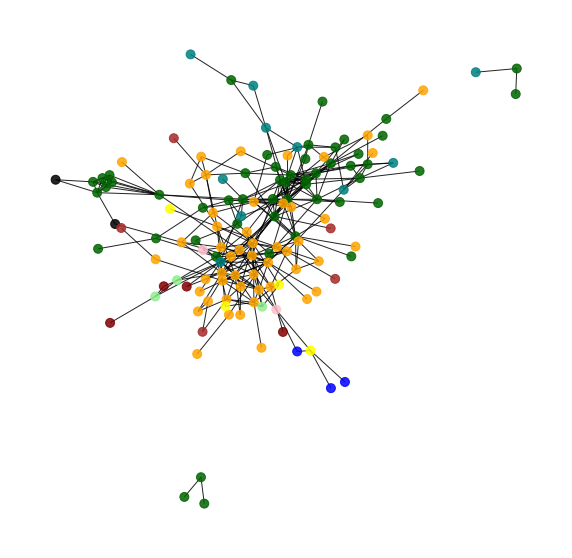

In [841]:
node_cmap = []

cmap = {
    0 : 'darkgreen',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'lightgreen',
    5 : 'yellow',
    6 : 'blue',
    7 : 'pink',
    8 : 'maroon',
    9 : 'brown',
    10 : 'purple',
    11 : 'grey',
    12: 'red'
}

# for c, group in enumerate(node_groups):
#     # get number of nodes per community
#     # print("Community -- ", c)
#     # print(len(group), "nodes\n")

#     # assign color 
#     for n in group:
#         node_cmap.append(cmap[c])

for c, com in enumerate(comm_10):
    com = list(com)
    for n, i in enumerate(com):
        node_cmap.append(cmap[c])
    

fig, ax = plt.subplots(figsize=(10, 10))

pos = nx.spring_layout(G_sampled, k=.25, iterations=100)
# pos = nx.shell_layout(G_sampled)
nx.draw(G_sampled, pos, node_size = 80, alpha = 0.85, node_color=node_cmap, ax=ax)
plt.show()